In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#df_train é utilizado para o treinamento
#df_test é utilizado para que as transformações que ocorrem no df_train também aconteçam no df_test

df_train = pd.read_csv('train.csv', sep="," , encoding="UTF8" )
df_test = pd.read_csv('test.csv', sep="," , encoding="UTF8" )

In [3]:
pd.set_option('display.max_columns', 999)
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

**NOTA**: Em um primeiro momento havia sido adotado apenas as colunas com valores contínuos como features para o modelo. Neste caso, as colunas foram: 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO',     'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4','NU_NOTA_COMP5'.

Como resultados, obteve-se: 

**MAE**: 43.2324952

**MSE**: 3049.56440453

**RMSE**: 55.22286125

**Coeficiente de Determinação (R2)**: 0.6902296831286995

Após, com base na leitura do dicionário de dados, foram adcionadas outras features que possivelmente poderiam melhorar o modelo

In [3]:
features = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'TP_SEXO',
    'TP_ESCOLA',
    'Q001','Q002','Q006','Q024', 'Q025','Q047']


In [40]:
#Verificando a correlação das variáveis contínuas com a variável target (NU_NOTA_MT)
corr = df_train[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_COMP1',
                  'NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_MT']].corr()

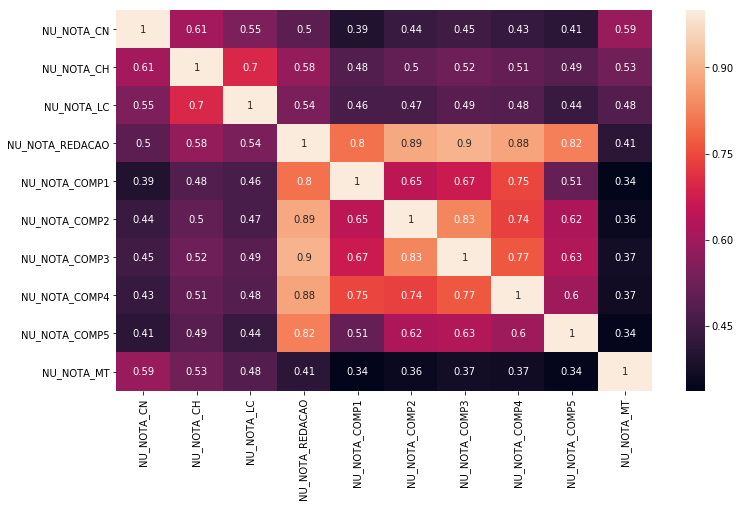

In [47]:
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True)

***Pré-processamento dos dados***

In [19]:
#o dataframe original é atualizado apenas com os valores das colunas abaixo, onde não se tem notas iguais a zero
#e nem valores nulos.

# Observação: com as demais features ['NU_IDADE','TP_SEXO', 'TP_ESCOLA', 'Q001','Q002','Q006','Q024','Q047'] 
# não foi feito o mesmo processo pois, com a retiradas das linhas referentes às colunas abaixo, já não restaram
# valores nulos...
df_train = df_train.loc[
      (df_train['NU_NOTA_CN'].notnull())  & (df_train['NU_NOTA_CN'] != 0) & (df_train['NU_NOTA_CH'].notnull())      & (df_train['NU_NOTA_CH'] != 0) 
    & (df_train['NU_NOTA_LC'].notnull())  & (df_train['NU_NOTA_LC'] != 0) & (df_train['NU_NOTA_REDACAO'].notnull()) & (df_train['NU_NOTA_REDACAO'] != 0)    
]

In [18]:
df_test = df_test.loc[
      (df_test['NU_NOTA_CN'].notnull())  & (df_test['NU_NOTA_CN'] != 0) & (df_test['NU_NOTA_CH'].notnull())      & (df_test['NU_NOTA_CH'] != 0) 
    & (df_test['NU_NOTA_LC'].notnull())  & (df_test['NU_NOTA_LC'] != 0) & (df_test['NU_NOTA_REDACAO'].notnull()) & (df_test['NU_NOTA_REDACAO'] != 0)    
]

In [20]:
# 'y_train' recebe a coluna 'NU_NOTA_MT' como target do modelo
# 'x_train' é o dataframe criado com as features selecionas para treinar o modelo..

y_train = df_train['NU_NOTA_MT']
x_train = df_train[features]
x_test = df_test[features]

In [13]:
x_train.isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_IDADE           0
TP_SEXO            0
TP_ESCOLA          0
Q001               0
Q002               0
Q006               0
Q024               0
Q025               0
Q047               0
dtype: int64

In [22]:
#utilizando o get_dummies para a transformação das variáveis categóricas
x_train = pd.get_dummies(x_train, columns=['Q001','Q002', 'Q006','Q024', 'Q025','Q047'], 
                         prefix=['Q001','Q002', 'Q006','Q024', 'Q025','Q047'])

x_test = pd.get_dummies(x_test, columns=['Q001','Q002', 'Q006','Q024', 'Q025','Q047'], 
                        prefix=['Q001','Q002', 'Q006','Q024', 'Q025','Q047'])

In [23]:
#para a coluna 'TP_SEXO' foi utilizado o LabelEncoder no intuito de apenas se criar uma nova coluna, com valores
# binários para esta variável..

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
TP_SEXO_int = enc.fit_transform(x_train['TP_SEXO'])
x_train['TP_SEXO'] = TP_SEXO_int

enc2 = LabelEncoder()
TP_SEXO_int_2 = enc.fit_transform(x_test['TP_SEXO'])
x_test['TP_SEXO'] = TP_SEXO_int_2

***Treinamento do modelo***

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
import time
from scipy.stats import pearsonr, shapiro


In [25]:
#etapas para o tunning do modelo

steps = [('scaler', StandardScaler()), ('Forest', RandomForestRegressor())]

In [26]:
parameters = {'Forest__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
              'Forest__max_features': ['auto', 'sqrt','log2',None],
              'Forest__min_samples_split': [2, 5, 10],
              'Forest__min_samples_leaf': [1, 2, 4],
              'Forest__bootstrap': [True, False],
              'Forest__warm_start': [True, False]}

In [27]:
pipeline = Pipeline(steps)
model = RandomizedSearchCV(pipeline, parameters, n_iter=10, scoring='explained_variance', cv=4)

In [34]:
# Os códigos a seguir serverm para fitar o modelo com o pipeline e mensurar o tempo gasto...

inicio = time.time()

model.fit(x_train, y_train)

tempo_gasto = (time.time() - inicio)/60

print('Tempo para fitar o modelo: {} min.'.format(tempo_gasto))

KeyboardInterrupt: 

In [56]:
print('Parâmetros do modelo após o tunning: {}'.format(model.best_params_))

Tuned Model Parameters: {'Forest__warm_start': False, 'Forest__n_estimators': 1800, 'Forest__min_samples_split': 10, 'Forest__min_samples_leaf': 4, 'Forest__max_features': 'sqrt', 'Forest__bootstrap': True}


In [33]:
model.best_params_

{'Forest__warm_start': False,
 'Forest__n_estimators': 600,
 'Forest__min_samples_split': 5,
 'Forest__min_samples_leaf': 4,
 'Forest__max_features': 'sqrt',
 'Forest__bootstrap': True}

In [44]:
#fazendo a predição do modelo

# Obs: aqui está sendo utilizado os dados de treinamento para a predição pois foi utilizado o cross-validation
# no momento de treinamento. Caso fosse utilizado o train_test_split os valores das métricas seriam diferentes..

y_pred_train = model.predict(x_train)

In [37]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 45.34689793216333
MSE: 3278.1489448507073
RMSE: 57.255121560002884


In [38]:
from sklearn.metrics import r2_score
R_2 = r2_score(y_train, y_pred_train)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)

Coeficiente de Determinação (R2): 0.6670103979798748
